**PROBLEM STATEMENT for K-NN:**

The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for PD.  Dataset can be downloaded from below link.

https://archive.ics.uci.edu/ml/datasets/parkinsons

Create classification model using KNN.  Identify the optimum no of neighbors and dimensions for your model.

Justify if KNN model should be considered or not for the problem statement.

evaluation will be based on..

1)  Handling of missing values, outliers, if any .

2)  Identifying data and model issues if any.

3) Choice of packages and distance measure used. justify your answer.

4) Selection of train, test split.

5) Final model creation and accuracy matrix selected for the model.

6) Future scope of the work.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv('parkinsons.data', sep=",")
pd.set_option('max_columns', 25)
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.shape

(195, 24)

In [4]:
data.describe(include='all')

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S04_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


In [5]:
# As we can see 'name' column has 100% uniqueness, we are dropping the 'name' column

data.drop('name', axis=1, inplace=True)

### Missing value treatment

In [6]:
data.isna().mean().round(4)*100

MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64

* we have no missing value in the dataset

### Duplicates treatment

In [7]:
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')

Number of duplicate rows = 0


* We have no duplicates

### Feature Engineering

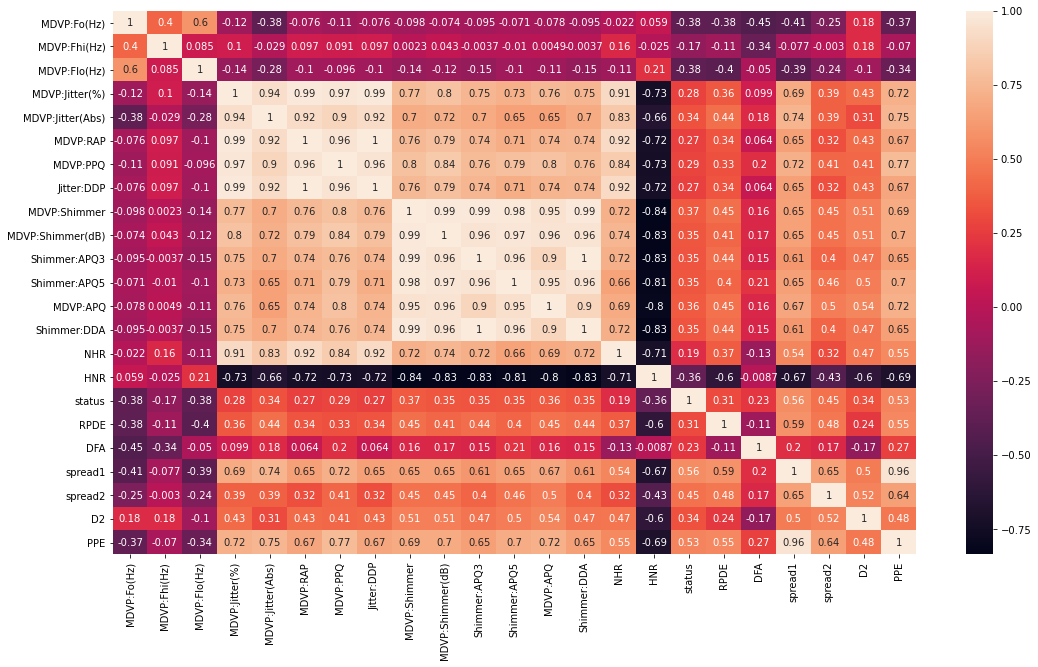

In [8]:
plt.rcParams['figure.figsize']=18,10

sns.heatmap(data.corr(), annot=True)

* By this correlation heatmap, we can see that many independent features are highly correlated with eachother. So, to omit multicolinearity let's work on features. 

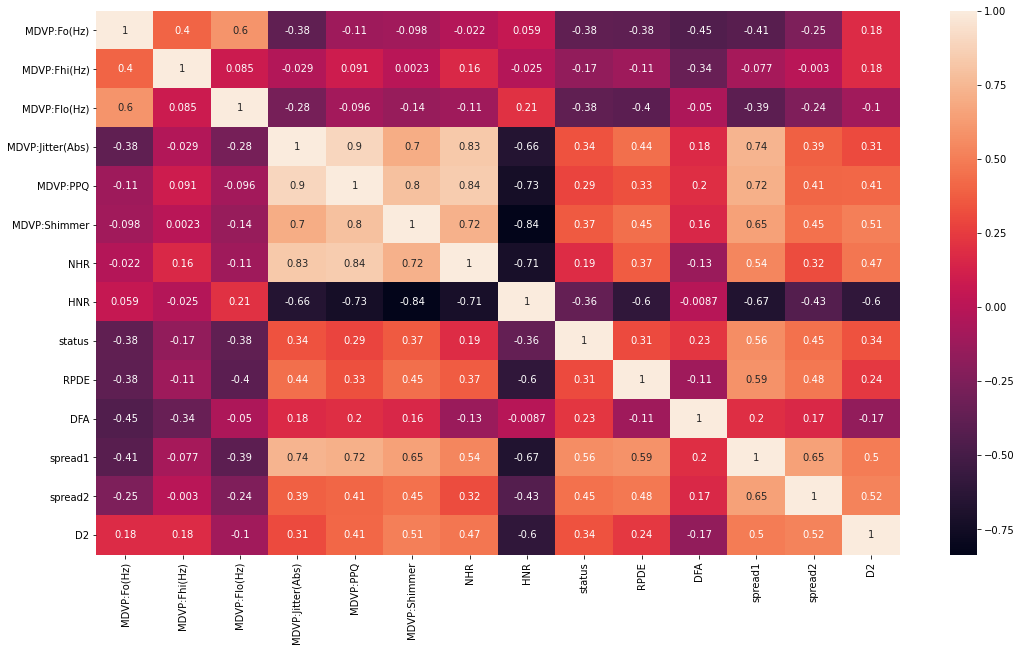

In [9]:
# Dropping highly correlated (95% or above) independent features
data.drop(['MDVP:RAP', 'MDVP:Jitter(%)', 'Jitter:DDP', 
          'PPE', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
            'Shimmer:APQ5', 'Shimmer:DDA', 'MDVP:APQ'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True)

* Now, we have removed the features which are correlated more than 95 percentage

### Outlier Treatment

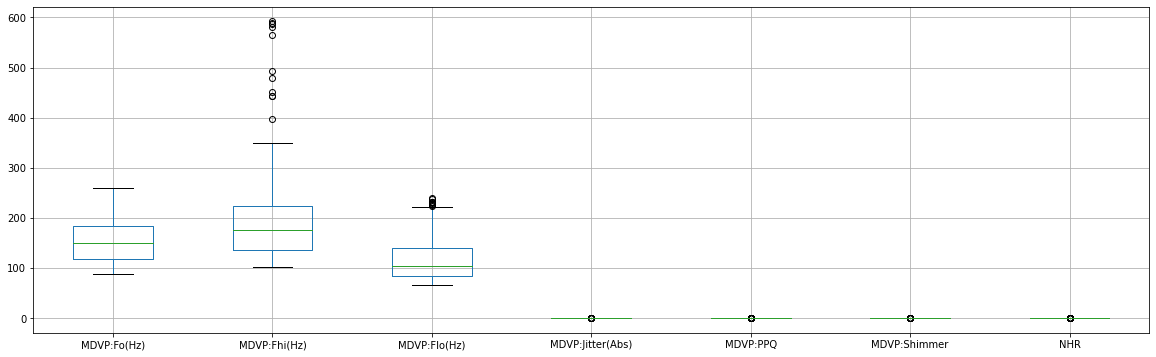

In [10]:
data.iloc[:, :7].boxplot(figsize=(20,6))

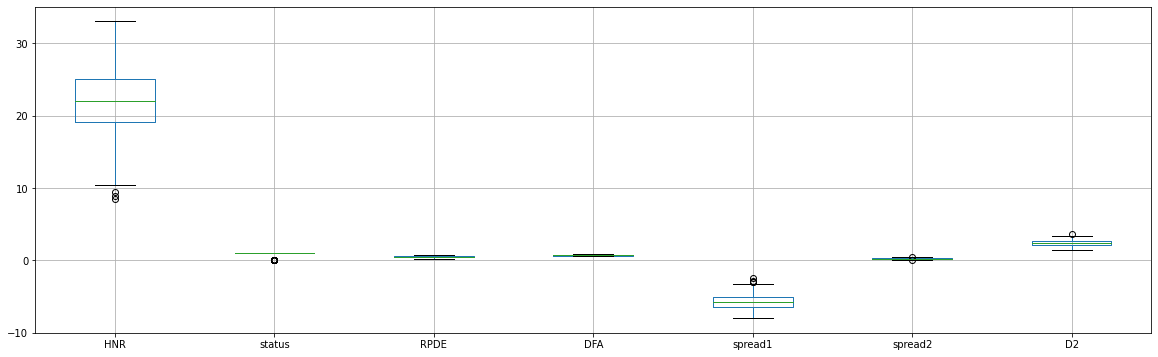

In [11]:
data.iloc[:, 7:].boxplot(figsize=(20,6))

Removing the extreme ends of every feature using z-score
* Whichever datapoints are before -3 and after +3 standard deviation remove those

In [12]:
def remove_outliers(df, col, z=3):
    mean = df[col].mean()
    global df1
    sd= df[col].std()
    final_list=[x for x in df[col] if (x> mean - z*sd)]
    final_list=[x for x in final_list if (x < mean + z*sd)]
    df1=df.loc[df[col].isin(final_list)]
    return df1

In [13]:
cols=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:PPQ', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2']

for i in cols:
    data = remove_outliers(data, i)

In [14]:
data.shape

(173, 14)

### Scaling Treatment

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('status',axis=1))
scaled_features = scaler.transform(data.drop('status',axis=1))

In [16]:
X = pd.DataFrame(scaled_features,columns=cols)
y=data['status']

### Imbalance treatment

In [17]:
healthy = data[data['status']==0]
not_healthy=data[data['status']==1]

In [18]:
print(healthy.shape, not_healthy.shape)

(45, 14) (128, 14)


* We have huge imbalance in data

In [19]:
from imblearn.over_sampling import RandomOverSampler
ros =  RandomOverSampler(random_state=12)

In [20]:
Xos, yos = ros.fit_resample(X, y)
Xos.shape,yos.shape

((256, 13), (256,))

### Model building

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xos,yos,test_size=0.23, random_state=12)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
error_rate = []
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Error Rate')

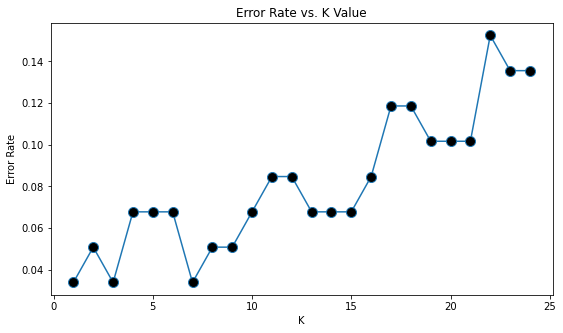

In [24]:
plt.figure(figsize=(9,5))
plt.plot(range(1,25),error_rate, marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that if the number of neighbors value increases more than 7, the error rate also increases. So we are choosing 7 as the n_neighbors value.

In [25]:
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [26]:
pred = knn.predict(X_test)

### Accuracy matrics

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

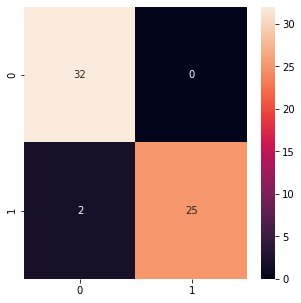

In [28]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



### Future scope of the work
* In future we can try implementing this project with any boosting algorithms
* We can train this model with large size dataset
* We can also improve accuracy by doing tuning hyperparametrs using gridsearcv or randomizedsearchcv

                    -------------- Thanks for this opportunity, Have a great day -----------------